# Sparse Matrices in Python
### by [Jason DeBacker](https://jasondebacker.com), January 2025

This notebook illustrates how to create sparse matrices in Python using the `scipy` package.  We'll also illustrate how to perform basic operations with sparse matrices, including comparing them to dense matrices.

In [29]:
# imports
import pandas as pd
import numpy as np
import scipy
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import timeit

## Creating a simple sparse matrix

Below, we create a 2D Numpy array, a matrix.

We then convert this to a sparse matrix (in CSR format) and back again.

In [46]:
# create dense matrix
A = np.array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S)
# reconstruct dense matrix
B = S.todense()
print(B)

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2
[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


In [31]:
# calculate sparsity
sparsity = 1.0 - np.count_nonzero(A) / A.size
print(sparsity)

0.7222222222222222


## Now, a larger matrix

Let's create and view a larger sparse matrix -- and, again, compare this to a dense matrix.

In [47]:
np.random.seed(seed=12)  ## for reproducibility
dataset = np.random.binomial(1, 0.1, 20000000).reshape(2000,10000)  ## dummy data
y = np.random.binomial(1, 0.5, 2000)  ## dummy target variable

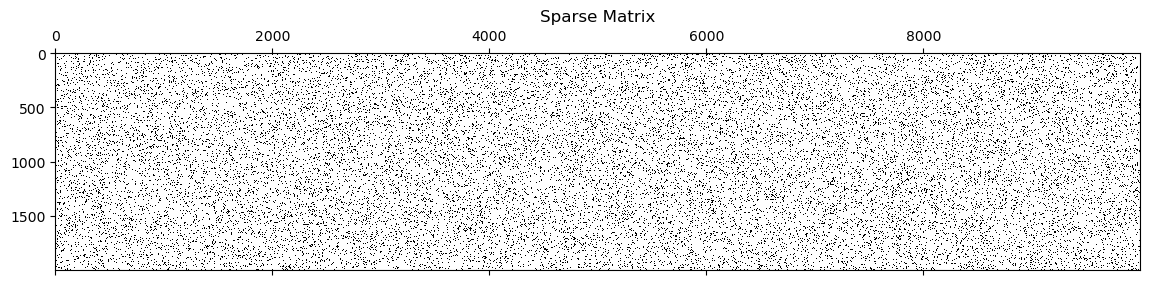

In [48]:
plt.figure(figsize=(14,12))
plt.spy(dataset)
plt.title("Sparse Matrix");
# export to png
plt.savefig("./images/sparse_matrix.png", bbox_inches='tight')

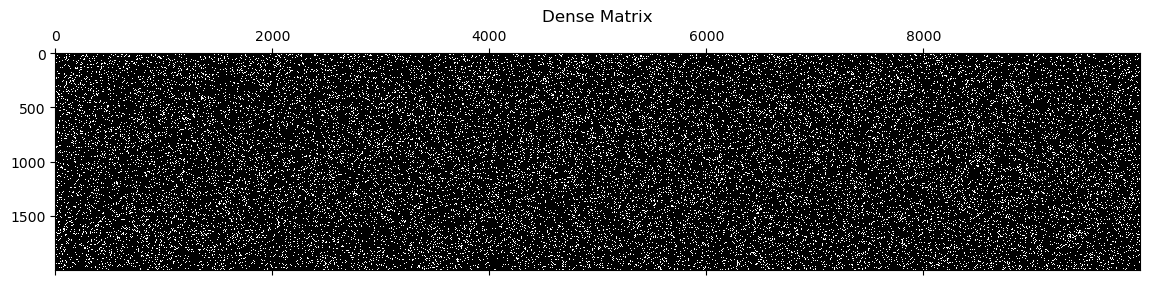

In [49]:
np.random.seed(seed=43)
plt.figure(figsize=(14,12))
plt.spy(np.random.binomial(1, 0.9, 20000000).reshape(2000,10000))
plt.title("Dense Matrix");
# export to png
plt.savefig("./images/dense_matrix.png", bbox_inches='tight')

## Working with sparse matrices

Why save a matrix as sparse?  The sparse and dense matrices above have exactly the same number of elements.  So, why bother with sparse matrices?

The answer is that sparse matrices are much more efficient when the number of non-zero elements is small relative to the total number of elements.  This is because sparse matrices only store the non-zero elements and their locations.  This can save a lot of memory and computation time.

Let's look at these differences in memory usage and computation time.

### Compression

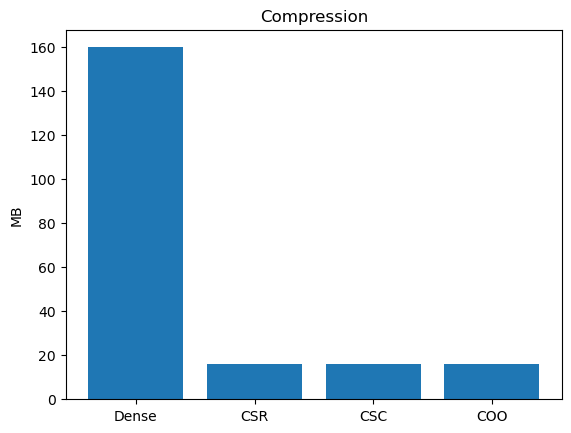

In [35]:
sparse_dataset = csr_matrix(dataset)
# Compression
size_dict = {
    "Dense": np.array(dataset).nbytes/1e6,
    "CSR": scipy.sparse.csr_matrix(dataset).data.nbytes/1e6,
    "CSC": scipy.sparse.csc_matrix(dataset).data.nbytes/1e6,
    "COO": scipy.sparse.coo_matrix(dataset).data.nbytes/1e6,
}

plt.bar(size_dict.keys(), size_dict.values())
plt.ylabel('MB')
plt.title('Compression')
plt.savefig("./images/compression.png", bbox_inches='tight')

### Computations with sparse matrices

In [36]:
# make a smaller data set
np.random.seed(seed=12)  ## for reproducibility
dataset = np.random.binomial(1, 0.1, 2000*1000).reshape(2000,1000)  ## dummy data
dataset.T @ dataset

array([[190,  22,  13, ...,  20,  25,  17],
       [ 22, 195,  17, ...,  21,  22,  20],
       [ 13,  17, 192, ...,  14,  22,  17],
       ...,
       [ 20,  21,  14, ..., 182,  19,  18],
       [ 25,  22,  22, ...,  19, 198,  21],
       [ 17,  20,  17, ...,  18,  21, 190]])

In [37]:
# fraction of entries of dataset that are non-zero
fraction = np.count_nonzero(dataset) / dataset.size
print(fraction)

0.099815


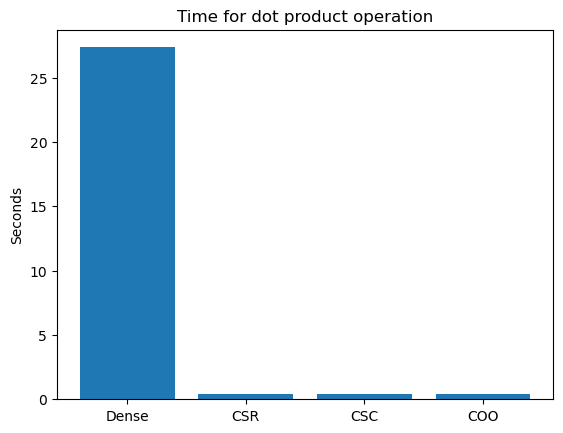

In [38]:
# Computation -- Matrix multiplication
csr_data = scipy.sparse.csr_matrix(dataset)
csc_data = scipy.sparse.csc_matrix(dataset)
coo_data = scipy.sparse.coo_matrix(dataset)
time_dense = timeit.timeit('dataset.T @ dataset', globals=globals(), number=10)
time_csr = timeit.timeit('csr_data.T @ csr_data', globals=globals(), number=10)  # careful to use @ not np.dot() for matrix mult with sparse arrays
time_csc = timeit.timeit('csc_data.T @ csc_data', globals=globals(), number=10)
time_coo = timeit.timeit('coo_data.T @ coo_data', globals=globals(), number=10)
time_dict = {
    "Dense": time_dense,
    "CSR": time_csr,
    "CSC": time_csc,
    "COO": time_coo,
}

plt.bar(time_dict.keys(), time_dict.values())
plt.ylabel('Seconds')
plt.title('Time for dot product operation')
plt.savefig("./images/sparse_times.png", bbox_inches='tight')

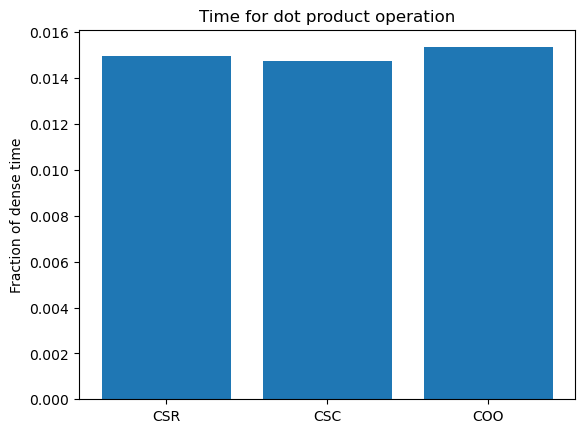

In [39]:
# plot fraction of dense time
dense_time = time_dict["Dense"]
sparse_times = {k: v for k, v in time_dict.items() if k != "Dense"}
plt.bar(sparse_times.keys(), [v/dense_time for v in sparse_times.values()])
plt.ylabel('Fraction of dense time')
plt.title('Time for dot product operation')
plt.savefig("./images/sparse_times_fraction.png", bbox_inches='tight')

/Users/jason.debacker/anaconda3/envs/usitc-env/lib/python3.12/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jason.debacker/anaconda3/envs/usitc-env/lib/python3.12/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/Users/jason.debacker/anaconda3/envs/usitc-env/lib/python3.12/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


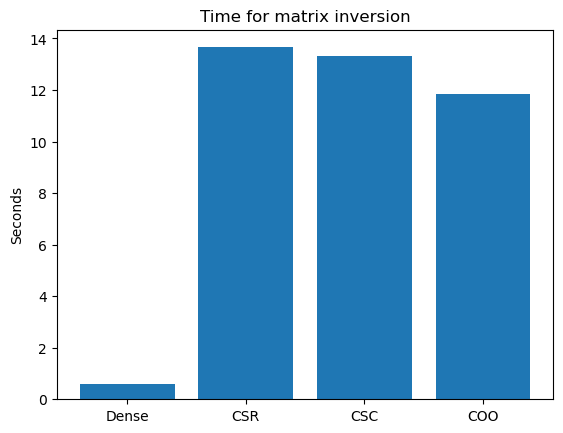

In [50]:

# Time for matrix inversion
np.random.seed(seed=12)  ## for reproducibility
square_data = np.random.binomial(1, 0.1, 1000*1000).reshape(1000,1000)  ## dummy data
csr_data = scipy.sparse.csr_matrix(square_data)
csc_data = scipy.sparse.csc_matrix(square_data)
coo_data = scipy.sparse.coo_matrix(square_data)
time_dense = timeit.timeit('np.linalg.inv(square_data)', globals=globals(), number=10)
time_csr = timeit.timeit('scipy.sparse.linalg.inv(csr_data)', globals=globals(), number=10)  # note the use of scipy inverse function
time_csc = timeit.timeit('scipy.sparse.linalg.inv(csc_data)', globals=globals(), number=10)
time_coo = timeit.timeit('scipy.sparse.linalg.inv(coo_data)', globals=globals(), number=10)
time_dict = {
    "Dense": time_dense,
    "CSR": time_csr,
    "CSC": time_csc,
    "COO": time_coo,
}

plt.bar(time_dict.keys(), time_dict.values())
plt.ylabel('Seconds')
plt.title('Time for matrix inversion')
plt.savefig("./images/sparse_times_invert.png", bbox_inches='tight')

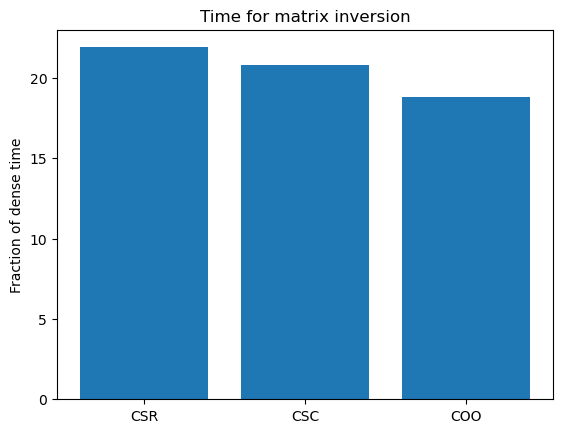

In [41]:
# plot as fraction of dense time
dense_time = time_dict["Dense"]
sparse_times = {k: v for k, v in time_dict.items() if k != "Dense"}
plt.bar(sparse_times.keys(), [v/dense_time for v in sparse_times.values()])
plt.ylabel('Fraction of dense time')
plt.title('Time for dot product operation')
plt.title('Time for matrix inversion')
plt.savefig("./images/sparse_times_invert_fraction.png", bbox_inches='tight')

#### Be Careful

See the inversion times are not so good. See the warnings of the `scipy` package:

> If the inverse of A is expected to be non-sparse, it will likely be faster to convert A to dense and use scipy.linalg.inv.

In [51]:
print("Sparsity of dense matrix = ", 1 - np.count_nonzero(square_data)/square_data.size)
inv_square = np.linalg.inv(square_data)
print("Sparsity of the inverse = ", 1 - np.count_nonzero(inv_square)/inv_square.size)



Sparsity of dense matrix =  0.900201
Sparsity of the inverse =  0.0


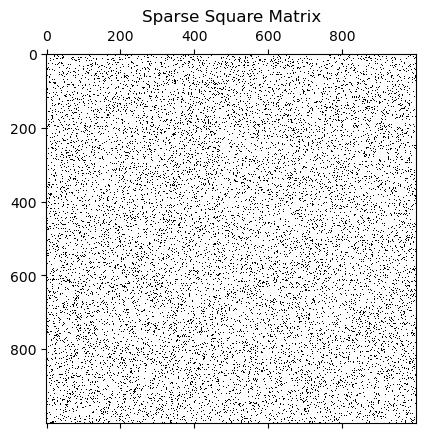

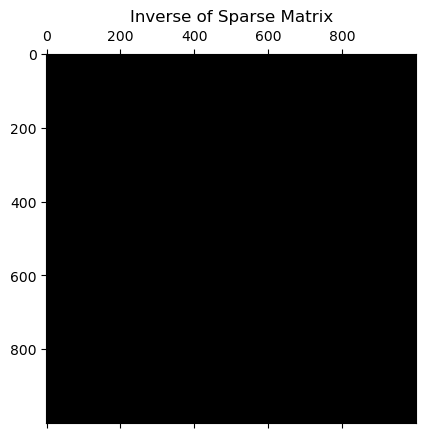

In [52]:
plt.spy(square_data)
plt.title("Sparse Square Matrix")
plt.show()
plt.spy(inv_square)
plt.title("Inverse of Sparse Matrix")
plt.show()

# Sparse data in Pandas

Pandas DataFrames can also be sparse.

The example below shows how to create a sparse DataFrame from a dense DataFrame and the degree of memory savings.

See the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html) for more information.

In [53]:
# sparse data in pandas https://pandas.pydata.org/docs/user_guide/sparse.html
df = pd.DataFrame(np.random.binomial(1, 0.1, 20000000).reshape(2000,10000))
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 10000 entries, 0 to 9999
dtypes: int64(10000)
memory usage: 152.6 MB


In [54]:
df_sparse = df.astype(pd.SparseDtype("float", 0))
df_sparse.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 10000 entries, 0 to 9999
dtypes: Sparse[float64, 0](10000)
memory usage: 22.9 MB


In [58]:
df_sparse.sum()

0       216.0
1       172.0
2       187.0
3       188.0
4       196.0
        ...  
9995    214.0
9996    193.0
9997    187.0
9998    198.0
9999    197.0
Length: 10000, dtype: Sparse[float64, 0]